(motor-drive)=
# Systemischen Wirkungsgrad von Motoren und Antriebssystemen optimieren

:::{admonition} **Lernziele**
- Typische Verlustmechanismen von Motor- und Antriebssystemen verstehen
- mithilfe von Normen, Formeln und Diagrammen
- um sinnvolle Energieeffizienzmaßnahmen vorschlagen zu können
:::

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import schemdraw
from schemdraw import flow

print('Versionen der verwendeten python-Module:')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('shutil', shutil)
print('schemdraw', schemdraw.__version__)

Versionen der verwendeten python-Module:
numpy 2.1.1
matplotlib 3.9.2
pandas 2.2.3
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>
schemdraw 0.19


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
if shutil.which('latex'): plt.rcParams['text.usetex'] = True

## Systemaufbau und Anwendungen

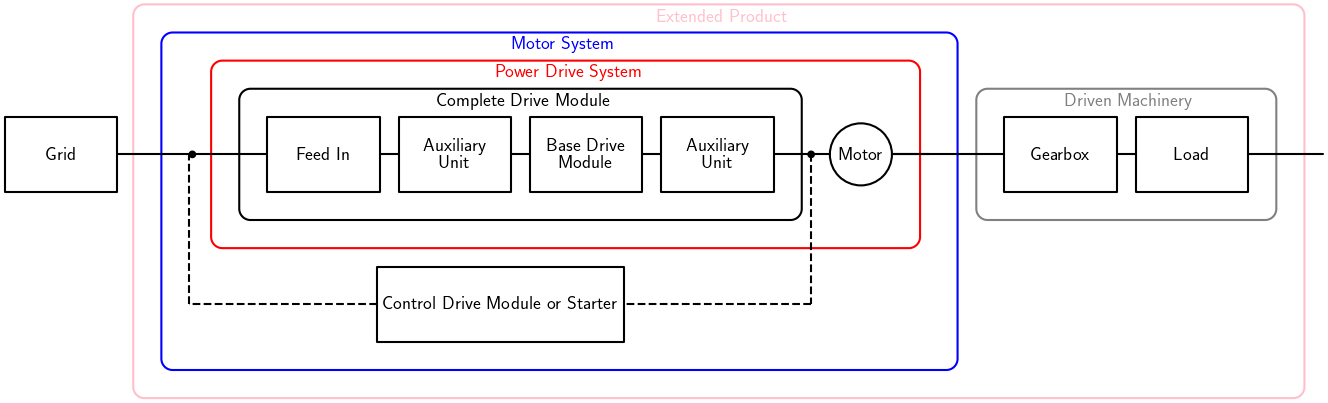

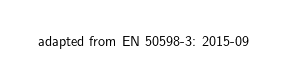

In [3]:
with schemdraw.Drawing() as d:
    d.config(fontsize=18, unit=.5)
    flow.Box().label('Grid')
    flow.Line().length(2).right()
    dec1 = flow.Dot()
    flow.Line().length(2).right()
    with d.container() as e:
        with d.container() as m:
            with d.container() as a:
                with d.container() as v:
                    flow.Box().label('Feed In').drop('E')
                    flow.Line().right()
                    flow.Box().label('Auxiliary \nUnit')
                    flow.Line().right()
                    flow.Box().label('Base Drive \nModule')
                    flow.Line().right()
                    flow.Box().label('Auxiliary \nUnit')
                    v.color('black')
                    v.label('Complete Drive Module', loc='N', halign='center', valign='top')
                flow.Line().length(1).right()
                dec2 = flow.Dot()
                d.push()
                flow.Line().length(.5).right()
                m1 = flow.Connect().label('Motor')
                a.color('red')
                a.label('Power Drive System', loc='N', halign= 'center', valign = 'top')
            flow.Line().length(1).right()
            d.pop()
            flow.Line().linestyle('--').length(4).down()
            flow.Line().linestyle('--').length(5).left()
            flow.Box().label('Control Drive Module or Starter')
            flow.Line().linestyle('--').length(5).left()
            flow.Line().linestyle('--').length(4).up()
        m.color('blue')
        m.label('Motor System', loc='N', halign = 'center', valign = 'top')
        flow.Line().length(3).right().at(m1.E)
        with d.container() as n:
            flow.Box().label('Gearbox')
            flow.Line().right()
            flow.Box().label('Load')
            n.color('gray')
            n.label('Driven Machinery', loc = 'N', halign = 'center', valign = 'top')
    e.color('pink')
    e.label('Extended Product', loc='N', halign = 'center', valign = 'top')        
    flow.Line().length(2).right()
flow.Box().label('adapted from EN 50598-3: 2015-09').linestyle('')

## Wirkungsgrad eines elektrischen Antriebssystems

Nach DIN CLC/TS 60034-31 (VDE V0530-31): 2011-08 ist der Wirkungsgrad eines elektrischen Motors:

\begin{equation}
\eta = \frac{\text{Mechanische Leistung}}{\text{Aufgenommene Wirkleistung}} = \frac{\text{Mechanische Leistung}}{\text{Mechanische Leistung + Verluste}}
\end{equation}

- Der Wirkungsgrad hängt von Belastung und Drehzahl ab.
- Der Volllast-Wirkungsgrad eines Motors steigt mit der Baugröße und der Bemessungsleistung. Hochspannungsmotoren mit Leistungen >> 1 MW haben $\eta > 95\%$.
- Meist haben Motoren für höhere Bemessungsdrehzahlen höhere Wirkungsgrade.
- Mechanische Maßnahmen wie Riemenzüge oder Getriebe zur Herabsetzung der Drehzahl können höhere Verluste verursachen als direkt gekuppelte Motoren mit geringerer Bemessungsdrehzahl.

## Verluste im Motor

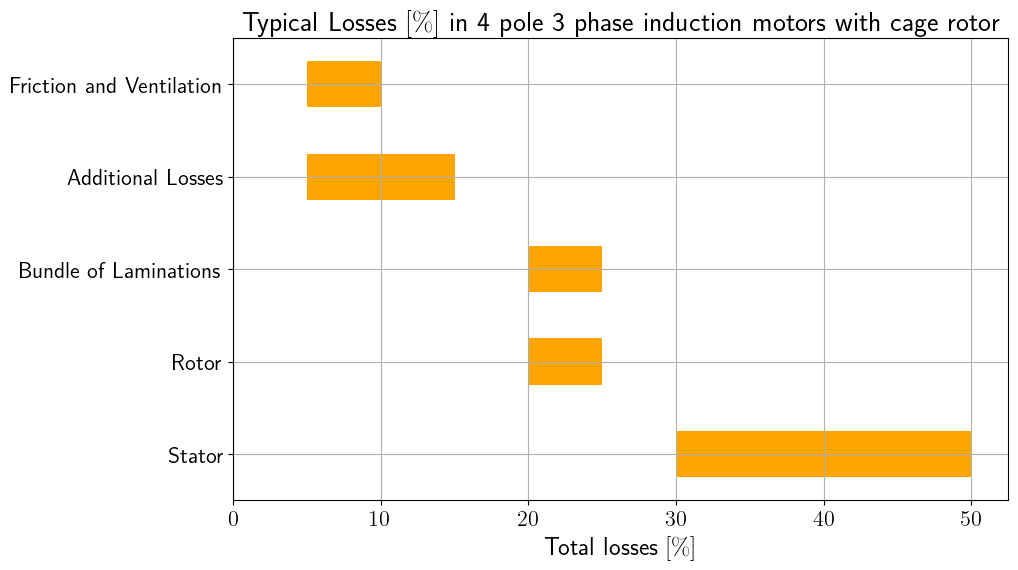

In [4]:
# min and max value from DIN CLC/TS 60034-31: 2011-08
data_losses = {'Losses': ['from minimum', 'up to additional'],'Stator': [30, 20], 'Rotor': [20, 5], 'Bundle of Laminations': [20,5], 'Additional Losses': [5,10], 'Friction and Ventilation': [5,5]}
losses = pd.DataFrame(data=data_losses)
losses.set_index('Losses').T.plot(kind = 'barh', stacked = True, title=r'Typical Losses $[\%]$ in 4 pole 3 phase induction motors with cage rotor', legend = False, color=['white','orange'])
plt.xlabel(r'Total losses $[\%]$')
plt.grid()
plt.show()

Bei der Wandlung von elektrischer Energie in mechanische entstehen Verluste, die teilweise lastabhängig sind: 
- Stromwärmeverluste in Stator (Ständer) und Rotor (Läufer): der durch die Wicklungen mit Widerstand $R$ fließende Strom $I$ verursacht Verluste $P_V = I^2 \cdot R$
- Zusatzverluste proportional zum Quadrat des Drehmoments $P_V \propto M^2$: Verluste durch Grundfeld und Oberwellen im Eisen, Stromverdrängungsverluste in den Teilleitern des Stators, Kreisströme zwischen parallelen Teilleitern und Oberwellenverluste in den Rotorstäben bei Belastung

Großteils lastunabhängig entstehen weitere Verluste: 
- Eisenverluste in den Blechpaketen von Stator (hauptsächlich) und Rotor sowie Hysterese- und Wirbelstromverluste durch den Aufbau des magnetischen Feldes
- mechanische Verluste (Reibung, Ventilation) in Lagern, Lüftern und Dichtungen
- zusätzliche Oberschwingungen und damit einhergehende Verluste verursachen *Frequenzumrichter*, wobei die Verluste sich mit wachsender Schaltfrequenz verringern

Andere Bauformen als dreiphasige Induktionsmotoren mit Käfigläufer reduzieren bestimmte Verluste:
- Synchronmotoren ohne Erreglerwicklung vermeiden nahezu vollständig Rotorverluste
- Synchronmotoren mit Dauermagneterregung und Reluktanzmotoren können abhängig vom eingesetzen Magnetmaterial einen höheren Leistungsfaktor besitzen, erfordern jedoch einen Frequenzumrichter und einen Rotorlagegeber (je nach Umrichteralgorithmus). Sie sind bei Regelung mit Pulsweitenmodulation deutlich effizienter als Induktionsmotoren. 
- Kleine und/oder schnelllaufende Motoren lassen sich mit blockförmiger Spannung kleiner Schaltfrequenz einfach regeln - diese Maschinen sind bürstenlose Gleichstrommaschinen oder elektronisch kommutierte Motoren. Sie sind ein wenig effizienter als Induktionsmotoren. 

## Toleranzen

Toleranzen aufgrund von Material- und Fertigungsschwankungen wirken sich aus: Z.B. kann ein Anstieg der Eisenverluste um 10% (innerhalb der Toleranz des Blechlieferanten) bewirken, dass der Wirkungsgrad bei einem konkreten Beispielmotor mit 88,8% (Effizienzklasse IE2) auf 88,5% (Effizienzklasse IE1) sinkt. Der tatsächliche Wirkungsgrad darf um eine festgelegte Toleranz niedriger sein als der Bemessungswirkungsgrad laut IEC 60034-1.

Hinzu kommen Messgenauigkeiten bei der Ermittlung des Wirkungsgrades nach IEC 60034-2-1: Das ausgewählte Messverfahren, die Temperatur im Messraum, Kenngrößen der Prüfeinrichtungen und Bedienungseinflüsse führen dazu, dass derselbe Motor bei der nächsten Messung andere Ergebnisse verursacht. 

Motoraufbau im Detail verschieden ausgeführt: Aus DIN EN 60034-30-1 (VDE 0530-30-1):2014-12 geht zudem hervor, dass optionale Hilfseinrichtungen (d.h. die nicht Teil der Motorkonstruktion sind) wie Wellendichtringe, Fremdlüfter, mechanische Bremsen, Rücklaufsperren, unidirektionale Lager, Drehgeber und Tachogeneratoren sich auf die genauen Verluste auswirken. Eine Vermessung eines Motors mit allen möglichen Kombinationen von Hilfseinrichtungen ist zu aufwendig. Daher können andere Werte als die Datenblattwerte auftreten.

## Verhalten von Motoren, Frequenzumrichtern und Drehzahlstellantrieben

### Motoren

#### Wirkungsgrad als Funktion von Nennleistung und Drehmoment

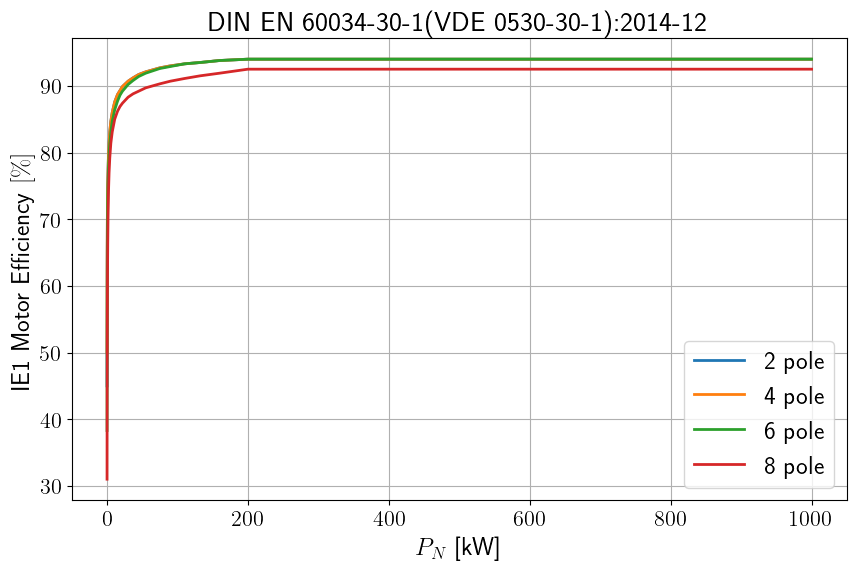

In [10]:
motorparamsIE1 = pd.DataFrame({'PN [kW]': [0.12,0.18,0.20,0.25,0.37,0.40,0.55,0.75,1.1,1.5,2.2,3,4,5.5,7.5,11,15,18.5,22,30,37,45,55,75,90,110,132,160,200,250,315,355,400,450,500,1000]})
motorparamsIE1 = motorparamsIE1.set_index('PN [kW]')
motorparamsIE1['2 pole'] = [45.0,52.8,54.6,58.2,63.9,64.9,69.0,72.1,75.0,77.2,79.7,81.5,83.1,84.7,86.0,87.6,88.7,89.3,89.9,90.7,91.2,91.7,92.1,92.7,93.0,93.3,93.5,93.8,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0]
motorparamsIE1['4 pole'] = [50.0,57.0,58.5,61.5,66.0,66.8,70.0,72.1,75.0,77.2,79.7,81.5,83.1,84.7,86.0,87.6,88.7,89.3,89.9,90.7,91.2,91.7,92.1,92.7,93.0,93.3,93.5,93.8,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0]
motorparamsIE1['6 pole'] = [38.3,45.5,47.6,52.1,59.7,61.1,65.8,70.0,72.9,75.2,77.7,79.7,81.4,83.1,84.7,86.4,87.7,88.6,89.2,90.2,90.8,91.4,91.9,92.6,92.9,93.3,93.5,93.8,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0]
motorparamsIE1['8 pole'] = [31.0,38.0,39.7,43.4,49.7,50.9,56.1,61.2,66.5,70.2,74.2,77.0,79.2,81.4,83.1,85.0,86.2,86.9,87.4,88.3,88.8,89.2,89.7,90.3,90.7,91.1,91.5,91.9,92.5,92.5,92.5,92.5,92.5,92.5,92.5,92.5]
motorparamsIE1.plot(xlabel = r'$P_N$ [kW]', ylabel = r'IE1 Motor Efficiency $[\%]$', title = 'DIN EN 60034-30-1(VDE 0530-30-1):2014-12')
plt.grid()
plt.show()

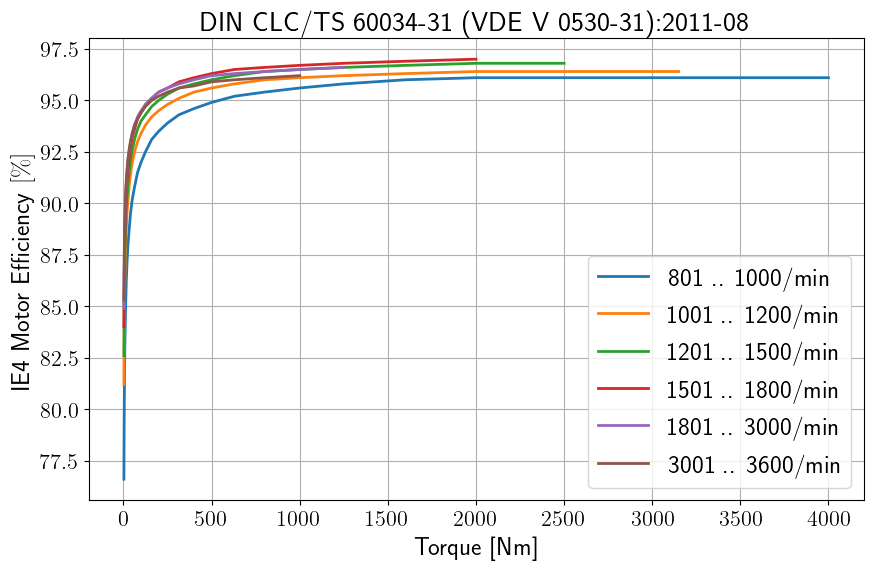

In [6]:
motorparamsIE4 = pd.DataFrame({'Torque [Nm]': [2.5,3.2,4.0,5.0,6.3,8,10,12.5,16,20,25,32,40,50,63,80,100,125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000]})
motorparamsIE4 = motorparamsIE4.set_index('Torque [Nm]')
motorparamsIE4['801 .. 1000/min'] = [76.6,78.0,79.4,80.6,81.9,83.1,84.1,85.1,86.2,87.1,87.9,88.7,89.5,90.2,90.8,91.5,92.0,92.5,93.1,93.5,93.9,94.3,94.6,94.9,95.2,95.4,95.6,95.8,96.0,96.1,96.1,96.1,96.1]
motorparamsIE4['1001 .. 1200/min'] = [81.2,82.3,83.4,84.4,85.4,86.3,87.2,88.0,88.8,89.5,90.1,90.8,91.4,92.0,92.5,93.0,93.4,93.8,94.2,94.5,94.8,95.1,95.4,95.6,95.8,96.0,96.1,96.2,96.3,96.4,96.4,96.4,np.nan]
motorparamsIE4['1201 .. 1500/min'] = [82.6,83.7,84.7,85.6,86.5,87.4,88.1,88.9,89.7,90.3,90.9,91.5,92.1,92.6,93.1,93.6,94.0,94.3,94.7,95.0,95.3,95.6,95.8,96.0,96.2,96.4,96.5,96.6,96.7,96.8,96.8,np.nan,np.nan]
motorparamsIE4['1501 .. 1800/min'] = [84.0,85.0,85.9,86.8,87.6,88.4,89.1,89.8,90.5,91.1,91.6,92.2,92.7,93.2,93.6,94.1,94.4,94.8,95.1,95.4,95.6,95.9,96.1,96.3,96.5,96.6,96.7,96.8,96.9,97.0,np.nan,np.nan,np.nan]
motorparamsIE4['1801 .. 3000/min'] = [84.9,85.9,86.7,87.5,88.3,89.1,89.7,90.3,91.0,91.5,92.1,92.5,93.0,93.4,93.8,94.2,94.5,94.8,95.1,95.4,95.6,95.8,96.0,96.2,96.3,96.4,96.5,96.6,np.nan,np.nan,np.nan,np.nan,np.nan]
motorparamsIE4['3001 .. 3600/min'] = [85.3,86.1,87.0,87.8,88.5,89.2,89.9,90.5,91.1,91.6,92.1,92.6,93.0,93.4,93.8,94.1,94.4,94.7,95.0,95.2,95.4,95.6,95.7,95.9,96.0,96.1,96.2,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
motorparamsIE4.plot(ylabel = r'IE4 Motor Efficiency $[\%]$', title = 'DIN CLC/TS 60034-31 (VDE V 0530-31):2011-08')
plt.grid()
plt.show()

#### Lebensdauer von Motoren

aus DIN CLC/TS 60034-31 (VDE V 0530-31): 2011-08 nach Bemessungsleistung des Motors

| 0,75-1,1 kW | 1,1-11 kW | 11 - 110 kW | 110-370 kW |
|-|-|-|-|
|10 Jahre | 12 Jahre | 15 Jahre | 20 Jahre |

zusätzlich abhängig von Betriebsstunden, Zyklen, Belastungsfaktor, Motorzuverlässigkeit, Wartungsqualität und Reparaturen - Sensitivitätsanalyse auf Robustheit der Ergebnisse empfohlen

Reparatur: Kosten für Neuwicklung (Wirkungsgrad kann sinken um 1-2,5%) mit Kauf eines neuen Motors vergleichen

IE3-Motoren mit 1,1-110 kW haben bei > 2000 Betriebsstunden/Jahr geringere Lebensdauerkosten als IE2 oder IE1

Wartung für Elektromotoren ist gering, wird daher oft vergessen. Ungünstige Betriebszustände bleiben unentdeckt: 
- unzureichende Kühlung, auch bei höheren Umgebungstemperaturen $\to R_{\text{Wicklung}} \uparrow$, $\eta \downarrow 0.2 .. 1\%$, Lebensdauer $\downarrow$, Energiebedarf $\uparrow$
- zusätzliche Reibung durch mechanische Fehlausrichtung, Keilriemen oder Schmierung nicht fachgerecht, hohe Feuchtigkeit, Verschmutzung, ständige Überlastung, anomale Spannung $\to$ Korrosion, Verschmutzung, Abnutzung $\to$ $\eta \downarrow$, Energiebedarf $\uparrow$

### Frequenzumrichter

Zusatzverluste
- 2% - 5% bei Nenndrehmoment und -drehzahl
- 10% - 30% bei 25% Drehmoment und -drehzahl

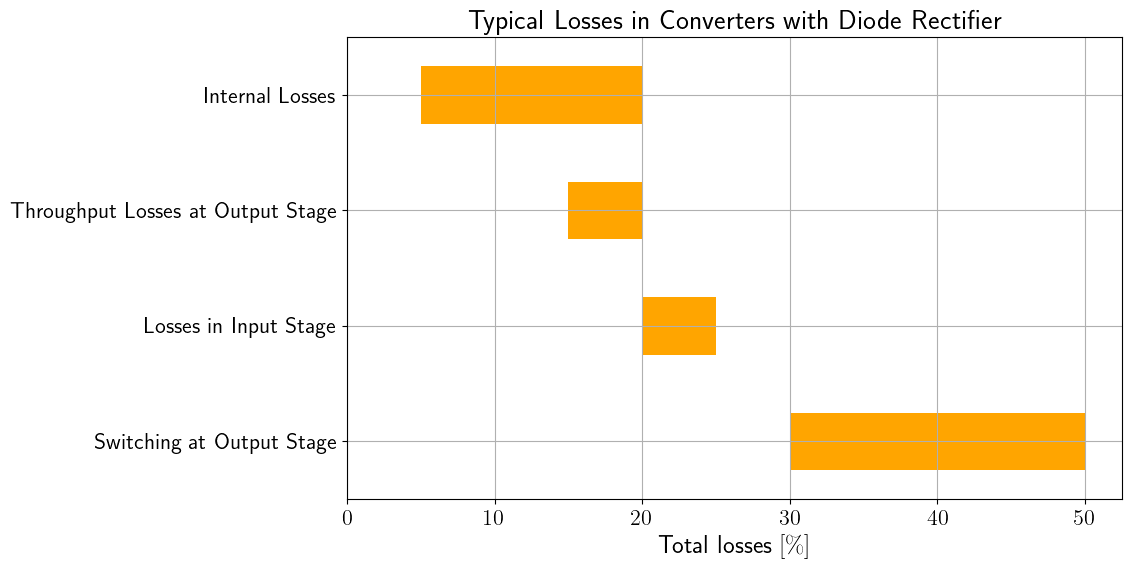

In [9]:
fcdata = pd.DataFrame({'Losses':['from','adding up to'],'Switching at Output Stage': [30,20], 'Losses in Input Stage': [20,5], 'Throughput Losses at Output Stage': [15,5], 'Internal Losses': [5,15]})
fcdata.set_index('Losses').T.plot(kind = 'barh', stacked = True, title=r'Typical Losses in Converters with Diode Rectifier', legend = False, color=['white','orange'])
plt.xlabel(r'Total losses $[\%]$')
plt.grid()
plt.show()

Leistungsfaktor für ungesteuerte Diodengleichrichter
- Einphasenumrichter $\lambda = 0.58$ (für $P_N \approx 0.5\text{ kW}$)
- Dreiphasenumrichter $\lambda = 0.64$ (für $P_N \approx 2\text{ kW}$)
- .. mit Netzdrossel $\lambda = 0.92$ (für $P_N \approx 2\text{ kW}$)
- .. mit kleiner Zwischenkreiskapazität $\lambda = 0.94$ (für $P_N \approx 1 .. 10\text{ kW}$)

Leistungsfaktor mit netzseitig gesteuertem Wechselrichter (active front-end) $\approx 1$

### Drehzahlstellantriebe

Auswahl und Auslegung anhand typischer Betriebsbedingungen
- Drehmoment und Drehzahl
- Kühlverfahren (Selbst- oder Fremdkühlung) bestimmt verminderte Motorleistung

## Anwendungen

### Pumpen, Lüfter und ähnliche Geräte

- sich ändernde Belastungen: Drehmoment $M$ nimmt fast um das Quadrat der Motordrehzahl $n^2$ zu
- elektrische Eingangsleistung $P_{\text{el}}$ des Motors nimmt um das Dreifache der Drehzahl $3n$ zu, wenn die Durchflussmenge in geschlossenen Leitungen und Rohren nur durch Drosseln und Klappen geregelt wird - Drehzahlstellantrieb reduziert diese Verluste
- Lastregelung mit polumschaltbaren Motoren bzw. gleichzeitig betriebene Systeme mit mehreren Motoren manchmal besser

#### Fallstudie: Pumpensystem für Kühlwasser

![Bild](https://www.mdpi.com/applsci/applsci-14-10430/article_deploy/html/images/applsci-14-10430-g001.png)

![Gemessene Systemeffizienz](https://www.mdpi.com/applsci/applsci-14-10430/article_deploy/html/images/applsci-14-10430-g004.png)

Zur Optimierung modelliert {cite:p}`lavric_model-based_2024` das System und erstellt für jede Komponente, d.h. Motor, Umrichter und Pumpe einen Zusammenhang $\eta = f(M,n,P)$ und nutzt, dass diese Größen auch mit der Druckdifferenz und der Flussrate zusammenhängen.

![nach Optimierung](https://www.mdpi.com/applsci/applsci-14-10430/article_deploy/html/images/applsci-14-10430-g015.png)

### Fördereinrichtungen, Fahrtreppen, Hebevorrichtungen und ähnliche Einrichtungen

- Drehmoment fast unabhängig von der Drehzahl $M \neq f(n)$
- Drehzahlstellantrieb ergelt Drehzahl kontinuierlich von 0 bis 100% der Höchstdrehzahl und minimiert so benötigte Leistung
- elektrische Eingangsleistung ändert sich linear zur Drehzahl

### Anwendugen mit minimaler Last- bzw. Drehzahländerung

- Drehzahlstellantrieb vorteilhaft für Sanftanlauf und -abbremsen oder für hohe Anlaufmomente: geringerer Verschleiß zusätzlich zur Energieeinsparung

:::{bibliography}
:filter: docname in docnames
:::